In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt

In [2]:
weight = 0.7  # True weight
bias = 0.3     # True bias

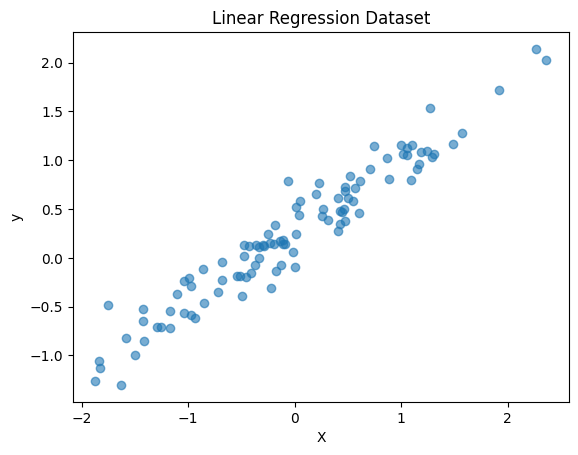

In [5]:
x = torch.randn(100, 1)
y = weight * x + bias + torch.randn(100, 1) * 0.2

plt.scatter(x, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Dataset')
plt.show()

**Creating Training and Test Sets**

In [6]:
dataset = TensorDataset(x, y)

# Split into train and test (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [7]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

Train batches: 3
Test batches: 1


**Creating PyTorch Model**

In [8]:
# Method 1: Using nn.Sequential
model_sequential = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

In [9]:
# Method 2: Using nn.Module (recommended)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear_layer(x)


model = LinearRegressionModel()
print(model)
print(f"Model parameters: {list(model.parameters())}")

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model parameters: [Parameter containing:
tensor([[0.3210]], requires_grad=True), Parameter containing:
tensor([0.0070], requires_grad=True)]


**Checking Model Internals**

In [10]:
print("Model state dict:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

print("\nModel structure:")
print(model)

Model state dict:
linear_layer.weight: tensor([[0.3210]])
linear_layer.bias: tensor([0.0070])

Model structure:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [11]:
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params}")


Total parameters: 2


**Training Model with PyTorch**

In [15]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for batch_x, batch_y in train_loader:
        predictions = model(batch_x)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()   # Zero gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update weights

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 10/100, Loss: 0.1065
Epoch 20/100, Loss: 0.0609
Epoch 30/100, Loss: 0.0444
Epoch 40/100, Loss: 0.0388
Epoch 50/100, Loss: 0.0388
Epoch 60/100, Loss: 0.0391
Epoch 70/100, Loss: 0.0331
Epoch 80/100, Loss: 0.0367
Epoch 90/100, Loss: 0.0347
Epoch 100/100, Loss: 0.0370


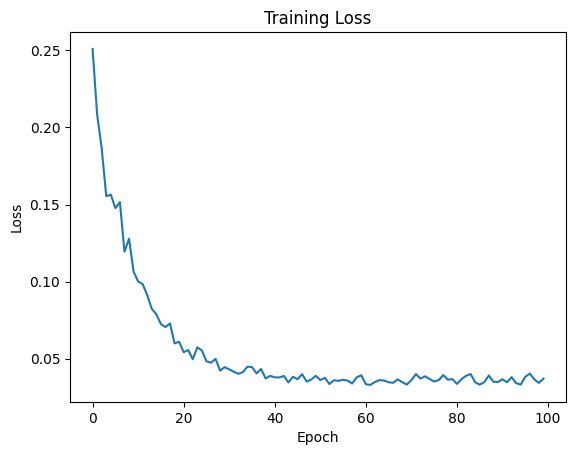

In [16]:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [17]:
model.eval()
test_loss = 0.0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        predictions = model(batch_x)
        loss = loss_fn(predictions, batch_y)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"Test Loss: {avg_test_loss:.4f}")

Test Loss: 0.0266


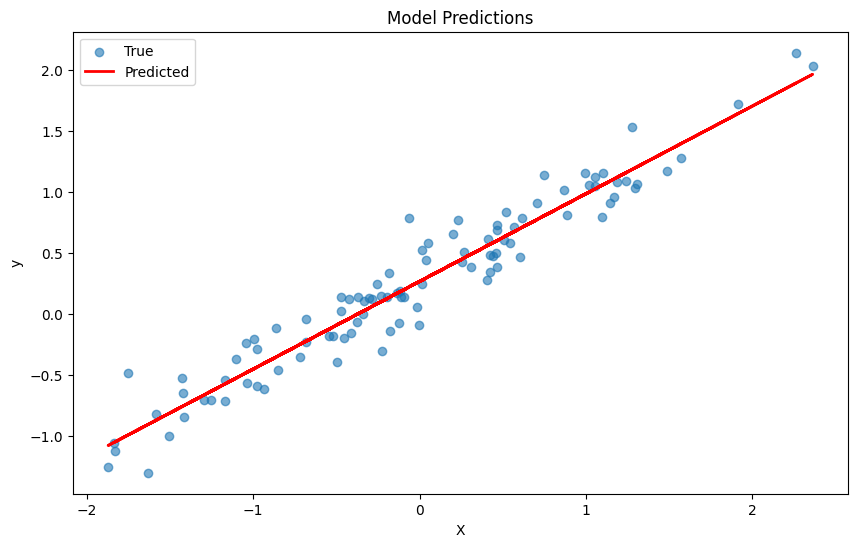

In [18]:
with torch.no_grad():
    y_pred = model(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='True')
plt.plot(x, y_pred, 'r-', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Model Predictions')
plt.show()

In [19]:
with torch.no_grad():
    sample_input = torch.tensor([[0.5]])
    prediction = model(sample_input)
    print(f"Prediction for input 0.5: {prediction.item()}")

Prediction for input 0.5: 0.6248886585235596


**Save Model**

In [20]:
# Save model state dict (recommended)
torch.save(model.state_dict(), 'linear_model.pth')

In [21]:
# Save entire model (not recommended for production)
torch.save(model, 'linear_model_full.pth')

**Load model**

In [22]:
# Method 1: Load state dict
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load('linear_model.pth'))
loaded_model.eval()

In [23]:
# Method 2: Load entire model
loaded_model_full = torch.load('linear_model_full.pth')
loaded_model_full.eval()